<a href="https://colab.research.google.com/github/tawadros312/Machine-learning-Implmentations/blob/master/Regression_on_Ames_Housing_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import io
from google.colab import files
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
#data is at https://github.com/tawadros312/Machine-learning-Implmentations/blob/master/Task2/AmesHousing.xls

uploded=files.upload()

Saving AmesHousing.xls to AmesHousing.xls


In [3]:
data=pd.read_excel(io.BytesIO(uploded['AmesHousing.xls']))
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:

print(data.shape)
data.describe(include='all')

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,2907,2907.000000,2930,2930,2930,2850,2850,2847,2850,2929.000000,2849,2929.000000,2929.000000,2929.000000,...,2930,2929,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,1508,2773,2771.000000,2771,2929.000000,2929.000000,2771,2771,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,5,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,NaN,NaN,NaN,NaN,2321,2887,1026,1015,1752,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,...,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,744,1731,NaN,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094881,5.563140,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.896801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.629566,NaN,49.722431,559.262547,1051.614544,...,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,1978.132443,NaN,1.766815,472.819734,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411026,1.111537,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,179.112611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.590839,NaN,169.168476,439.494153,440.615067,...,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,25.528411,NaN,0.760566,215.046549,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,334.000000,

In [5]:
data.info

<bound method DataFrame.info of       Order        PID  MS SubClass  ... Sale Type  Sale Condition  SalePrice
0         1  526301100           20  ...       WD           Normal     215000
1         2  526350040           20  ...       WD           Normal     105000
2         3  526351010           20  ...       WD           Normal     172000
3         4  526353030           20  ...       WD           Normal     244000
4         5  527105010           60  ...       WD           Normal     189900
...     ...        ...          ...  ...       ...             ...        ...
2925   2926  923275080           80  ...       WD           Normal     142500
2926   2927  923276100           20  ...       WD           Normal     131000
2927   2928  923400125           85  ...       WD           Normal     132000
2928   2929  924100070           20  ...       WD           Normal     170000
2929   2930  924151050           60  ...       WD           Normal     188000

[2930 rows x 82 columns]>

In [6]:
print(list(data.dtypes))

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('in

In [7]:
data1=data.drop(columns=['SalePrice'])
print(data1.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [8]:

categ=list(set(data1.columns)-set(data1.describe().columns))
data_numer=data1.drop(columns=categ)
data_numer.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010


In [9]:
numeric=data_numer.columns
print(type(categ))
print(categ)
print(numeric)

<class 'list'>
['Fence', 'Garage Type', 'Garage Finish', 'Central Air', 'Sale Condition', 'Pool QC', 'Exterior 1st', 'Sale Type', 'Kitchen Qual', 'Street', 'Exterior 2nd', 'Roof Matl', 'Utilities', 'Paved Drive', 'House Style', 'Lot Shape', 'Alley', 'MS Zoning', 'Foundation', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Exposure', 'Bldg Type', 'Bsmt Cond', 'Fireplace Qu', 'Garage Qual', 'Condition 2', 'Heating QC', 'Heating', 'BsmtFin Type 1', 'Exter Qual', 'Land Slope', 'Functional', 'Misc Feature', 'Garage Cond', 'Electrical', 'Roof Style', 'Land Contour', 'Exter Cond', 'Neighborhood', 'Condition 1', 'Lot Config', 'BsmtFin Type 2']
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath',

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac86406d68>,
      dtype=object)

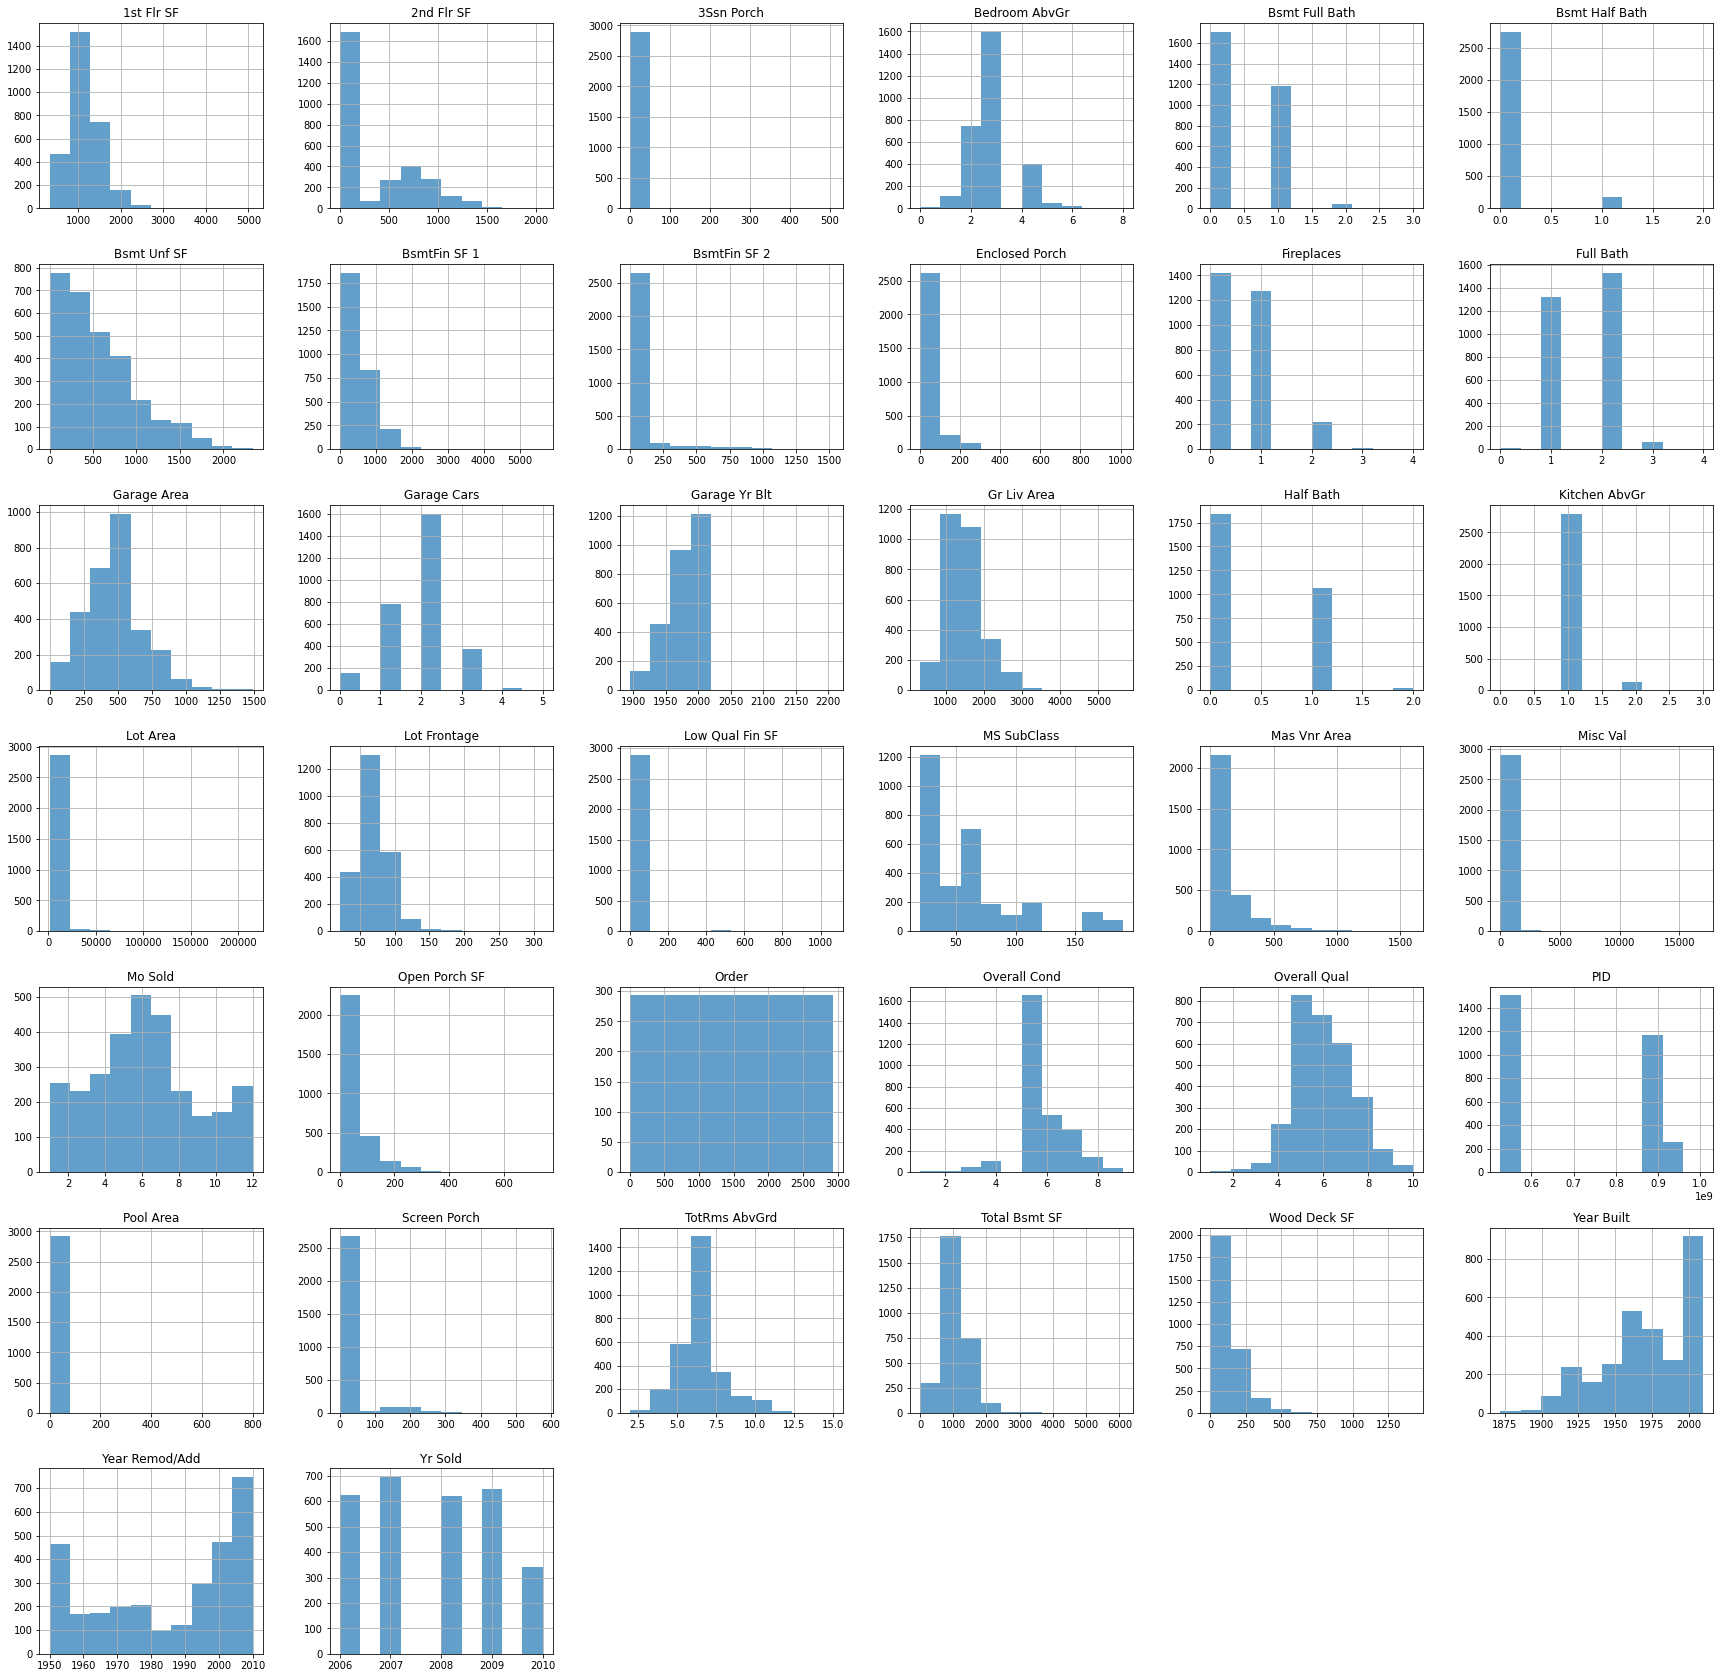

In [10]:
data_numer.hist(figsize=(30,30),alpha=0.7)

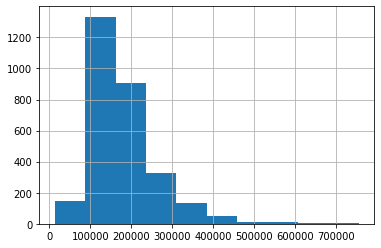

In [11]:
target=data.SalePrice
target.hist()

38


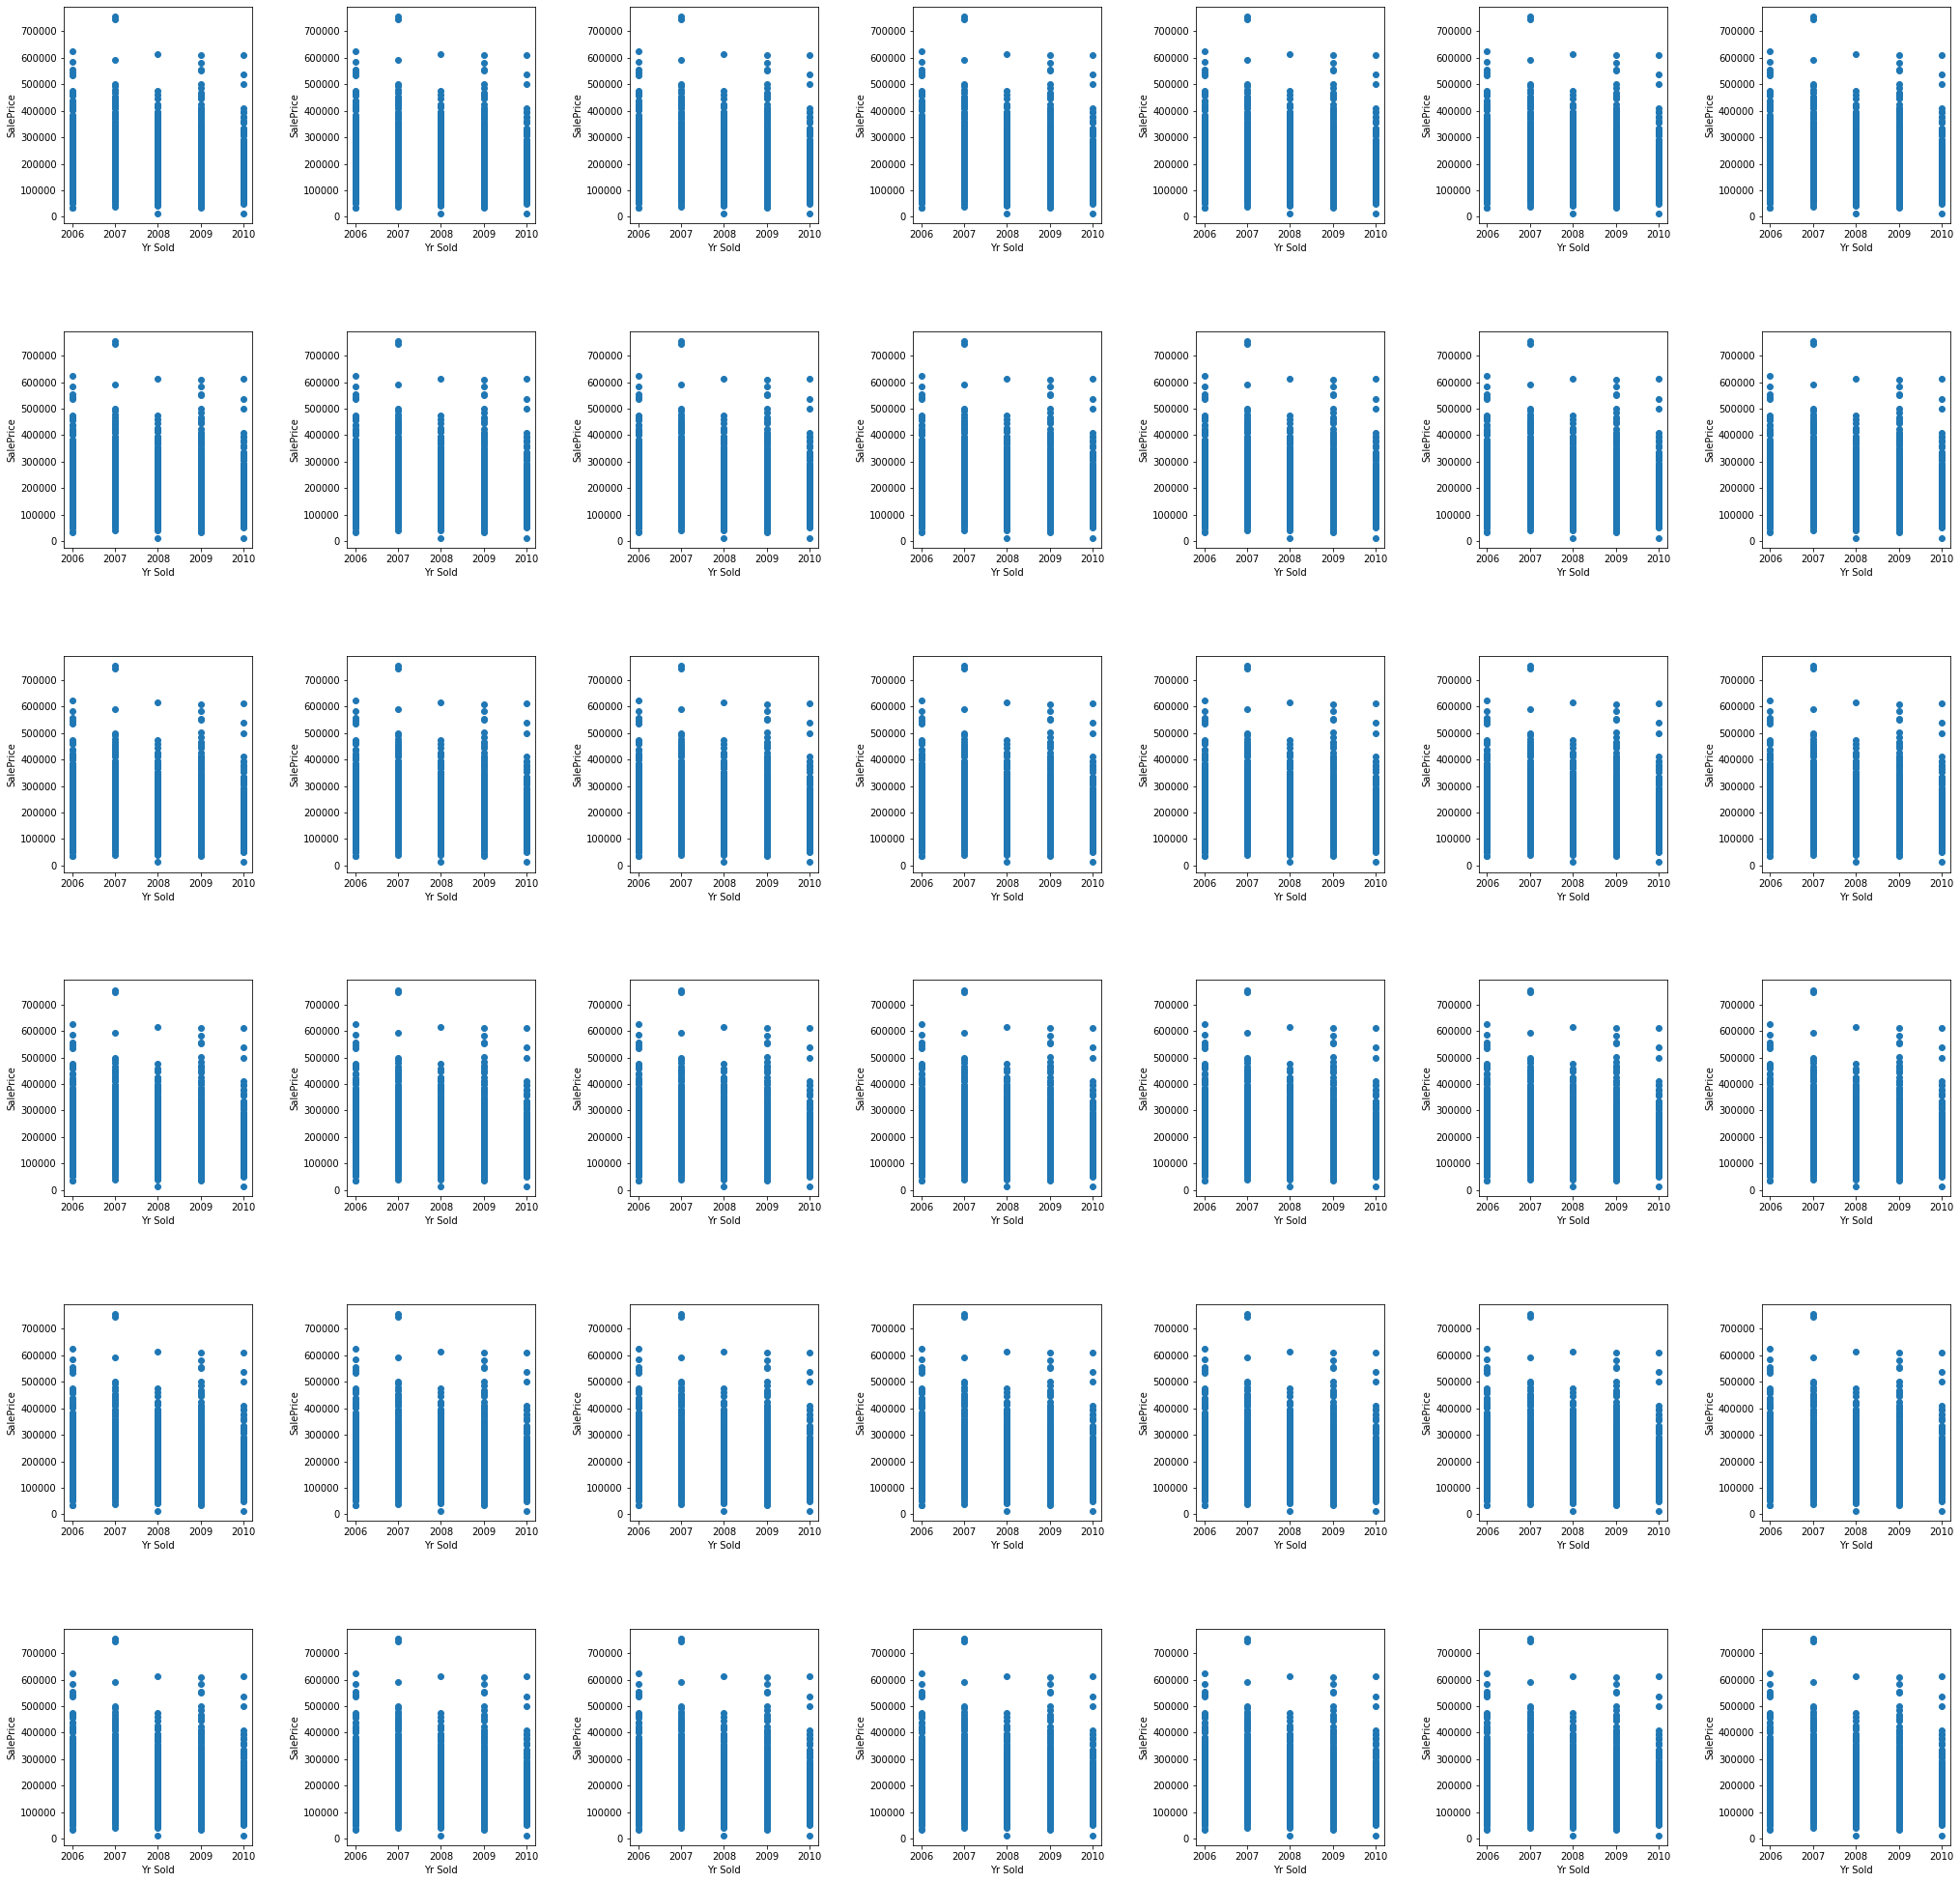

In [72]:
print(len(numeric))
#data.plot(kind='scatter',x=str(i),y='SalePrice',stacked =True)
fig,axes=plt.subplots(6,7,figsize=(35,35))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for j in range(0,6):  
  for index in range(0,7):
    
    axes[j,index].scatter(x=data[str(i)],y=data['SalePrice'],cmap=ListedColormap(['#0000aa', '#ff2020', '#50ff50']),marker='o')
    axes[j,index].set_xlabel(str(i))
    axes[j,index].set_ylabel('SalePrice')


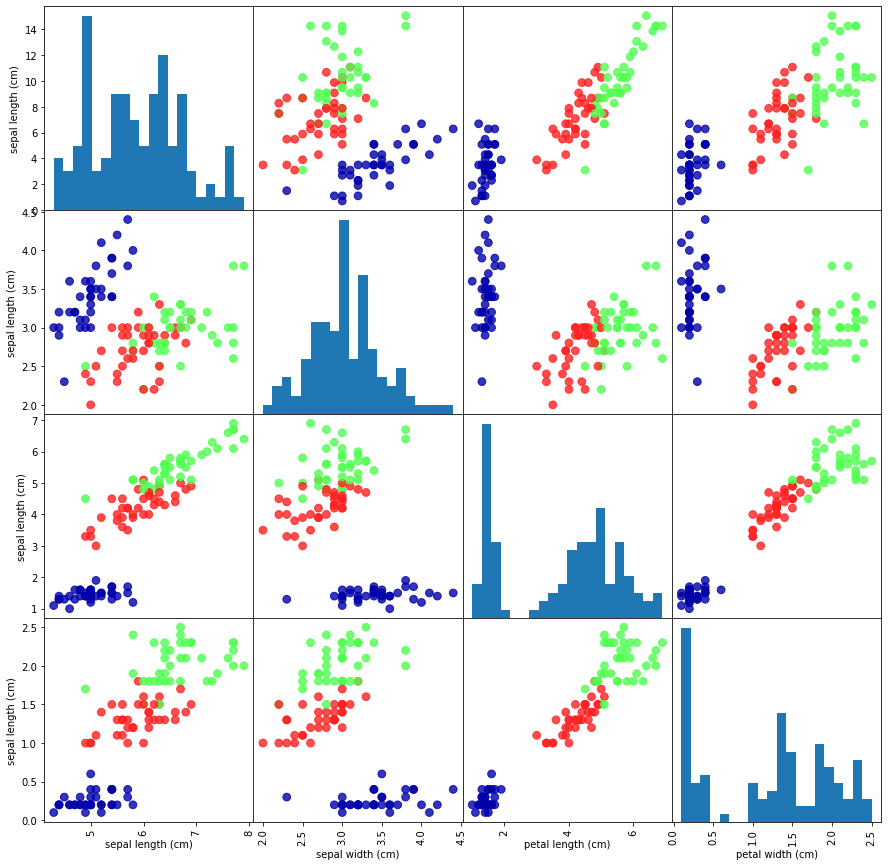

In [63]:


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()
Xtrain,Xtest,ytrain,ytest=train_test_split(iris['data'],iris['target'],stratify=iris['target'],random_state=0)
def my_scatter_matrix(data,bins,figsize,marker,cmap,c,labels,s,alpha):
  
  n=data.shape[1]
  features=[]
  #dividing data for every feature
  for i in range(n):
    features.append(data[:,i])
  #draw the figure and it's axis with required heigh and width
  fig ,axs=plt.subplots(n,n,figsize=figsize)
  fig.subplots_adjust(hspace=0.0, wspace=0.0)
  #removing unwanted axis 
  for ax  in axs.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if ax.is_first_col():
      
      ax.yaxis.set_visible(True)
      ax.yaxis.set_ticks_position('left')
    
  #rotating the x axis ticks by 90  
    if ax.is_last_row():
      plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
      ax.xaxis.set_visible(True)
      ax.xaxis.set_ticks_position('bottom')
    


  #drwaing the data on every axis in the figure
  for row in range(n):
    for column,label in zip( range(n), labels):
      if row==column:
        axs[row,column].hist(features[row],bins=bins)
      else :
        axs[row,column].scatter(features[column],features[row],marker=marker,cmap=cmap,c=c,alpha=alpha,s=s)
  #setting the labels on edges    
      if row==n-1:
          axs[row,column].set_xlabel(label)
      if column==0:
            axs[row,column].set_ylabel(label)

figure=my_scatter_matrix(Xtrain,20,(15,15),'o',ListedColormap(['#0000aa', '#ff2020', '#50ff50']),ytrain,iris.feature_names,60,0.8)